## Key words
### 평활화, 이동평균, 지수평활, rolling, ewm, seasonal_decompose

### 평활화(Smoothing)
 - 시계열 데이터를 일련의 정제법을 사용하여 보다 부드럽게 만드는 과정
 - 이동 평균법은 `단순이동평균법(Simpl Moving Average)`, `가중이동평균법(Weighted Moving Average)`이 있음
 - 지수 평활법은 `단순/이중/삼중` 지수 평활법이 있으며 각각 `EWMA, Winters, HoltWinters`로 불림
  - 이 중에 `EWMA` 학습할것임

### 시계열 분해(Time Series Decomposition)
 - 시계열 데이터를 일련의 공식을 활용하여 추세, 변동 등 세부 시계열 요소로 분리하는 일련의 과정
 - 고전 시계열 분해법은 가법모형(Addictive Model)과 승법모형(Multiplicative Model)이 있음

### pandas - rolling()
 - `단순이동평균`을 수행하는 pandas의 메서드
 - window 인자에는 이동평균 대상이 되는 데이터 개수를 지정
 - 뒤에 붙이는 메서드에 따라서 각 구간의 연산 결과가 달라짐
 - 뒤에 mean() 사용 필수
 - center에 True를 입력할 경우 중심 이동평균 실시 가능 

In [1]:
import pandas as pd

In [108]:
df = pd.read_csv("seoul_subway.csv")
df.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [113]:
df_sub = df.loc[(df["노선명"] == "1호선") & (df["역명"] == "종로3가"), ]
df_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
1,20191201,1호선,종로3가,19646,17772,20191204
593,20191202,1호선,종로3가,34277,32405,20191205
1184,20191203,1호선,종로3가,34957,32832,20191206
1776,20191204,1호선,종로3가,36007,33498,20191207
2426,20191205,1호선,종로3가,35536,33702,20191208


In [7]:
df_sub["MA_5"] = df_sub["승차총승객수"].rolling(window = 5).mean() # mean을 꼭 넣어줘야함
df_sub.head(8)

C:\Users\user\AppData\Local\Temp/ipykernel_16988/1276429794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["MA_5"] = df_sub["승차총승객수"].rolling(window = 5).mean() # mean을 꼭 넣어줘야함


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5
1,20191201,1호선,종로3가,19646,17772,20191204,NaN
593,20191202,1호선,종로3가,34277,32405,20191205,NaN
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6
2960,20191206,1호선,종로3가,36242,35437,20191209,35403.8
3602,20191207,1호선,종로3가,37687,36926,20191210,36085.8
4142,20191208,1호선,종로3가,22809,19859,20191211,33656.2


- 이전 데이터 5개의 값의 평균을 넣어줌

### pandas - ewm()
 - `단순이동평균`을 수행하는 pandas의 메서드
 - alpha 인자에는 `지수평활계수` 입력
 - 뒤에 붙이는 메서드에 따라서 각 구간의 연산결과가 달라짐
 - 뒤에 mean() 사용 필수

In [114]:
df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha = 0.9).mean() # mean을 꼭 넣어줘야함
df_sub.head(8)

C:\Users\user\AppData\Local\Temp/ipykernel_16988/2400981168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha = 0.9).mean() # mean을 꼭 넣어줘야함


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,EWMA_01
1,20191201,1호선,종로3가,19646,17772,20191204,19646.000000
593,20191202,1호선,종로3가,34277,32405,20191205,32946.909091
1184,20191203,1호선,종로3가,34957,32832,20191206,34757.801802
1776,20191204,1호선,종로3가,36007,33498,20191207,35882.192619
2426,20191205,1호선,종로3가,35536,33702,20191208,35570.616146
2960,20191206,1호선,종로3가,36242,35437,20191209,36174.862219
3602,20191207,1호선,종로3가,37687,36926,20191210,37535.786358
4142,20191208,1호선,종로3가,22809,19859,20191211,24281.678503


### statsmodels - seasonal_decompose()
 - `시계열 분해`를 위한 statsmodels의 함수
 - model 인자에 "multiplicative"를 입력하면 승법모형 적용(기본은 가법모형)
 - 입력하는 시계열 데이터는 pandas의 시리즈이며 인덱스는 시간 데이터 필수

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose # tsa: time series analysis

In [32]:
df = pd.read_csv("seoul_subway.csv")
df.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [33]:
df = df.set_index("사용일자")
df.head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191201,1호선,종로3가,19646,17772,20191204


In [34]:
df_sub = df.loc[(df["노선명"] == "1호선") & (df["역명"] == "종각"), ]
df_sub.head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191202,1호선,종각,48153,46770,20191205


In [35]:
# seasonal_decompose(df_sub["승차총승객수"]) # 오류남 - 타임인덱스를 사용해야함 

In [36]:
df_sub = df_sub.reset_index()
df_sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191202,1호선,종각,48153,46770,20191205


In [37]:
pd.to_datetime(df_sub["사용일자"][:4]) # 뒤에 이상한 숫자가 붙어있음

0   1970-01-01 00:00:00.020191201
1   1970-01-01 00:00:00.020191202
2   1970-01-01 00:00:00.020191203
3   1970-01-01 00:00:00.020191204
Name: 사용일자, dtype: datetime64[ns]

In [ ]:
#pd.to_datetime(df_sub["사용일자"]) # 그냥 이렇게 해주면 안됨

In [38]:
pd.to_datetime(df_sub["사용일자"][:4], format = '%Y%m%d') # format 인자를 넣어줘야함

0   2019-12-01
1   2019-12-02
2   2019-12-03
3   2019-12-04
Name: 사용일자, dtype: datetime64[ns]

In [41]:
df_sub["사용일자"] = pd.to_datetime(df_sub["사용일자"], format = '%Y%m%d')
df_sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2019-12-01,1호선,종각,19093,17141,20191204
1,2019-12-02,1호선,종각,48153,46770,20191205


In [42]:
df_sub = df_sub.set_index("사용일자") # 시계열 인덱스로 만들어줌
df_sub.head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
2019-12-01,1호선,종각,19093,17141,20191204
2019-12-02,1호선,종각,48153,46770,20191205


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49849 missing from current

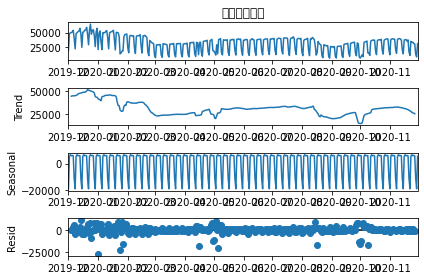

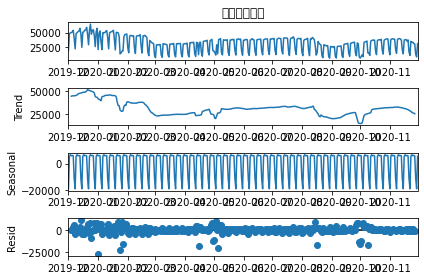

In [45]:
result = seasonal_decompose(df_sub["승차총승객수"])
print(result) # 그냥해도 안나오더니, 프린트해도 안나오네?
result.plot() # plot으로하니 그림으로 나오네

- 승차총승객수 데이터가 너무많아서 이렇게 나옴
- 좀 줄여보자

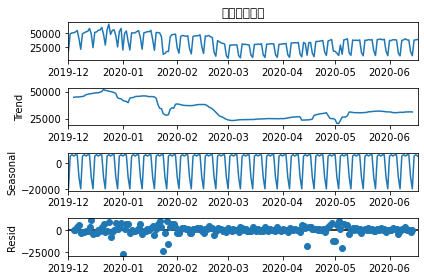

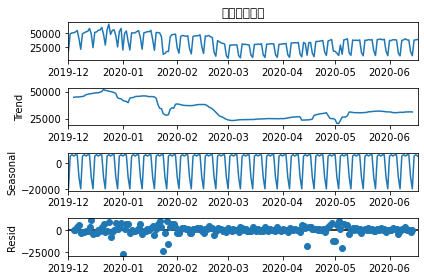

In [46]:
result = seasonal_decompose(df_sub["승차총승객수"][:200])
print(result) # 그냥해도 안나오더니, 프린트해도 안나오네?
result.plot() # plot으로하니 그림으로 나오네

In [47]:
result.trend # result.[tab] 누르면 원하는거 뽑아낼수 있음
# 이렇게 뽑아내서 예측을 하거나 또 연산을 할수도있음

사용일자
2019-12-01             NaN
2019-12-02             NaN
2019-12-03             NaN
2019-12-04    44560.142857
2019-12-05    44932.000000
                  ...     
2020-06-13    31186.714286
2020-06-14    31021.857143
2020-06-15             NaN
2020-06-16             NaN
2020-06-17             NaN
Name: trend, Length: 200, dtype: float64

### 1. rolling() 메서드의 window에 정수 n개 입력했을 때 결측치는 총 몇개?

정답 : n-1개

### 2. 6호선 이태원역 데이터를 활용하여 EWMA를 실시했을 때 지수평활계수가 0.1과 0.9로 설정한 결과를 비교하고자 한다. 2020년 11월 30일 기준 산출값 차이의 절대값은 ?
- seoul_subway.csv 파일의 하차 데이터 사용
- 주어진 데이터 전체를 활용하고 정수 부분만 기술

In [63]:
df = pd.read_csv("seoul_subway.csv")
df.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [64]:
df_sub = df.loc[(df["노선명"] == "6호선") & (df["역명"] == "이태원"), ]
df_sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
439,20191201,6호선,이태원,15817,12541,20191204
1030,20191202,6호선,이태원,12771,12974,20191205


In [65]:
df_sub["ewma_1"] = df_sub["하차총승객수"].ewm(alpha = 0.1).mean()
df_sub["ewma_2"] = df_sub["하차총승객수"].ewm(alpha = 0.9).mean()
df_sub.head(2)

C:\Users\user\AppData\Local\Temp/ipykernel_16988/1745802065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["ewma_1"] = df_sub["하차총승객수"].ewm(alpha = 0.1).mean()
C:\Users\user\AppData\Local\Temp/ipykernel_16988/1745802065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["ewma_2"] = df_sub["하차총승객수"].ewm(alpha = 0.9).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,ewma_1,ewma_2
439,20191201,6호선,이태원,15817,12541,20191204,12541.000000,12541.000000
1030,20191202,6호선,이태원,12771,12974,20191205,12768.894737,12934.636364


In [66]:
df_sub = df_sub.loc[df_sub["사용일자"] == 20201130, ]
df_sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,ewma_1,ewma_2
216590,20201130,6호선,이태원,7059,7109,20201203,8178.557456,6914.820146


In [67]:
df_sub["ewma_1"] - df_sub["ewma_2"]

216590    1263.737309
dtype: float64

### 3. 3호선 신사역 승차 총 승객수를 활용하여 시계열 분해 가법모형을 실시하였을 때 2020년 11월 30일의 추세값은?
- seoul_subway.csv 파일의 하차 데이터 사용
- extrapolate_trend = 1로 설정
- 주어진 데이터 전체를 활용하고 정수 부분만 기술

In [68]:
df = pd.read_csv("seoul_subway.csv")
df.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [87]:
df_sub = df.loc[(df["노선명"] == "3호선") & (df["역명"] == "신사"),]
df_sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
76,20191201,3호선,신사,18120,18435,20191204
668,20191202,3호선,신사,34918,37450,20191205


In [89]:
df_sub["사용일자"] = pd.to_datetime(df_sub["사용일자"], format = "%Y%m%d")
df_sub.head(2)

C:\Users\user\AppData\Local\Temp/ipykernel_16988/344697464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["사용일자"] = pd.to_datetime(df_sub["사용일자"], format = "%Y%m%d")


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
76,2019-12-01,3호선,신사,18120,18435,20191204
668,2019-12-02,3호선,신사,34918,37450,20191205


In [82]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 76 to 216476
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    366 non-null    datetime64[ns]
 1   노선명     366 non-null    object        
 2   역명      366 non-null    object        
 3   승차총승객수  366 non-null    int64         
 4   하차총승객수  366 non-null    int64         
 5   등록일자    366 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 20.0+ KB


In [90]:
df_sub = df_sub.set_index("사용일자")

In [99]:
result = seasonal_decompose(df_sub["승차총승객수"], model = "addictive", extrapolate_trend= 1)

In [98]:
result.trend.tail()

사용일자
2020-11-26    23306.571429
2020-11-27    22918.285714
2020-11-28    22202.571429
2020-11-29    21650.571429
2020-11-30    21098.571429
Name: trend, dtype: float64